# Image Captioning using Deep Learning [ Visualization of Data before and after preprocessing]
                                                                                       by Mahendra Nandi 
* [RKMVERI](http://cs.rkmvu.ac.in/) \
* [BDA Course](http://cs.rkmvu.ac.in/academics-msc-in-big-data-analytics-data-science/)\
[ Github](https://github.com/mahendranandi?tab=repositories)



```
 we have total **9**  py files [text_processing.py ,image_processing.py ,
 encoder_model.py ,visualization.py , model.py , data_loadre.py , train.py ,
  evaluation.py , test.py] and **3** ipynb files [visualization.ipynb , 
  conclusion.ipynb,test.ipynb ]. This is the 1st ipynb files 
```



### This notebook is mainly bassed on the visualization.py file . Maximum functions or classes are imported from that , though for requrement of variable I did import some other preprocessing.py file also , but you can easily ignore it if you can use the locally saved variables[ ,i.e, previously dumped ones from text_processing.py and image_processing.py]

In [ ]:
# this is for counting run time of a single cell
!pip install ipython-autotime
%load_ext autotime

time: 2.33 ms (started: 2021-06-29 10:52:38 +00:00)


In [ ]:
# this is how we mount the google drive to use data that already uploaded.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.02 ms (started: 2021-06-29 10:52:38 +00:00)


In [ ]:
# this directory is different for you please chnage it accordingly. Keep it where the py files are .
%cd /content/drive/MyDrive/BDA2020_MN/New_project

/content/drive/MyDrive/BDA2020_MN/New_project
time: 4.62 ms (started: 2021-06-29 10:52:38 +00:00)


In [ ]:
# importing required libraries
import pandas as pd
import pickle
from visualization import Visualization
from text_processing import TextProcess
from image_processing import ImageProcess

time: 7.92 ms (started: 2021-06-29 11:20:51 +00:00)


In [ ]:
data_dir = 'data/'                  # you please set your present directory accordingly (where the image an dthe text folders are . Just follow the codes below you can understand)
lemma_token_txt_path=data_dir+'Flickr8k_text/Flickr8k.lemma.token.txt'
train_images_txt_path=data_dir+'Flickr8k_text/Flickr_8k.trainImages.txt'
test_images_txt_path=data_dir+'Flickr8k_text/Flickr_8k.testImages.txt'
dev_images_txt_path=data_dir+'Flickr8k_text/Flickr_8k.devImages.txt'
maximum_length=40
image_folder_path ='data/Flickr8k_Dataset/Flicker8k_Dataset/'


time: 5.33 ms (started: 2021-06-29 11:20:52 +00:00)


## before any processing of the text data

In [ ]:
all_cap_df=pd.read_csv(lemma_token_txt_path,sep='\t',names=["img_id","img_caption"])
test_imd_id_df=pd.read_csv(test_images_txt_path,names=["img_id"])

time: 70.8 ms (started: 2021-06-29 11:20:53 +00:00)


In [ ]:
all_cap_df.head(12)

,img_id,img_caption
0,1305564994_00513f9a5b.jpg#0,A man in street racer armor be examine the tir...
1,1305564994_00513f9a5b.jpg#1,Two racer drive a white bike down a road .
2,1305564994_00513f9a5b.jpg#2,Two motorist be ride along on their vehicle th...
3,1305564994_00513f9a5b.jpg#3,Two person be in a small race car drive by a g...
4,1305564994_00513f9a5b.jpg#4,Two person in race uniform in a street car .
5,1351764581_4d4fb1b40f.jpg#0,A firefighter extinguish a fire under the hood...
6,1351764581_4d4fb1b40f.jpg#1,a fireman spray water into the hood of small w...
7,1351764581_4d4fb1b40f.jpg#2,A fireman spray inside the open hood of small ...
8,1351764581_4d4fb1b40f.jpg#3,A fireman use a firehose on a car engine that ...
9,1351764581_4d4fb1b40f.jpg#4,Firefighter use water to extinguish a car that...


time: 15.2 ms (started: 2021-06-29 11:20:54 +00:00)


In [ ]:
test_imd_id_df.head(12)

,img_id
0,3385593926_d3e9c21170.jpg
1,2677656448_6b7e7702af.jpg
2,311146855_0b65fdb169.jpg
3,1258913059_07c613f7ff.jpg
4,241347760_d44c8d3a01.jpg
5,2654514044_a70a6e2c21.jpg
6,2339106348_2df90aa6a9.jpg
7,256085101_2c2617c5d0.jpg
8,280706862_14c30d734a.jpg
9,3072172967_630e9c69d0.jpg


time: 15.8 ms (started: 2021-06-29 11:20:54 +00:00)


## after processing the text data

In [ ]:
## for short cut you can use the dumped files. But I hope you are seeing it before visiting all those py files, so you now dont have these files.
#  But after running the preprocess fles you will get these with you


# pickle_in=open("/content/drive/MyDrive/BDA2020_MN/Projects/New_project/pickle_files/test_captions.pickle","rb")
# test_captions=pickle.load(pickle_in)

# pickle_in=open("/content/drive/MyDrive/BDA2020_MN/Projects/New_project/pickle_files/test_features.pickle","rb")
# test_features=pickle.load(pickle_in)

# pickle_in=open("/content/drive/MyDrive/BDA2020_MN/Projects/New_project/pickle_files/words_to_indices.pickle","rb")
# words_to_indices=pickle.load(pickle_in)

# pickle_in=open("/content/drive/MyDrive/BDA2020_MN/Projects/New_project/pickle_files/indices_to_words.pickle","rb")
# indices_to_words=pickle.load(pickle_in)

# pickle_in=open("/content/drive/MyDrive/BDA2020_MN/Projects/New_project/pickle_files/all_words.pickle","rb")
# all_words=pickle.load(pickle_in)

time: 2.82 ms (started: 2021-06-29 11:20:57 +00:00)


In [ ]:
# don't worry by these codes, these are taken from the py files you will see after this. Just run these and see what happened.
#   In the mean time you will be able to interpret. For now just keep the terms in your memory
architecture="resnet50"
text_preprocess = TextProcess().initialize_custom(lemma_token_txt_path, train_images_txt_path, test_images_txt_path, dev_images_txt_path,maximum_length).process()
image_preprocess=ImageProcess().initialize_custom(architecture,image_folder_path)

test_captions=text_preprocess.get_test_captions()
words_to_indices=text_preprocess.get_w2i()
indices_to_words=text_preprocess.get_i2w()
all_words=text_preprocess.get_all_words()
test_features=image_preprocess.get_image_features(test_captions)

100%|██████████| 1000/1000 [00:00<00:00, 23486.32it/s]


94773248/94765736 [==============================] - 1s 0us/step


100%|██████████| 1000/1000 [08:33<00:00,  1.95it/s]

time: 9min (started: 2021-06-29 11:20:59 +00:00)


In [ ]:
list(words_to_indices.items())[:5]

[('!', 1), ('"', 2), ('#', 3), ('&', 4), ("'", 5)]

time: 18.4 ms (started: 2021-06-29 11:41:22 +00:00)


In [ ]:
list(indices_to_words.items())[:5]

[(1, '!'), (2, '"'), (3, '#'), (4, '&'), (5, "'")]

time: 7.04 ms (started: 2021-06-29 11:41:24 +00:00)


In [ ]:
list(test_captions.items())[:3]

[('3385593926_d3e9c21170.jpg',
  ['<start> Dog be in the snow in front of a fence . <end>',
   '<start> Dog play on the snow . <end>',
   '<start> Two brown dog playful fight in the snow . <end>',
   '<start> Two brown dog wrestle in the snow . <end>',
   '<start> Two dog play in the snow . <end>']),
 ('2677656448_6b7e7702af.jpg',
  ['<start> a brown and white dog swim towards some in a pool <end>',
   '<start> A dog in a swim pool swim toward sombody we cannot see . <end>',
   '<start> A dog swim in a pool near a person . <end>',
   '<start> Small dog be paddle through the water in a pool . <end>',
   '<start> A small brown and white dog be in a pool . <end>']),
 ('311146855_0b65fdb169.jpg',
  ['<start> A man and a woman in festive costume dance . <end>',
   '<start> A man and a woman with feather on her head dance . <end>',
   '<start> A man and a woman wear decorative costume and dance in a crowd of onlooker . <end>',
   '<start> one performer wear a feathered headdress dance with a

time: 9.72 ms (started: 2021-06-29 11:41:24 +00:00)


In [ ]:
all_words

'<start> A black dog be run after a white dog in the snow . <end> <start> Black dog chase brown dog through snow <end> <start> Two dog chase each other across the snowy ground . <end> <start> Two dog play together in the snow . <end> <start> Two dog run through a low lie body of water . <end> <start> A little baby play croquet . <end> <start> A little girl play croquet next to a truck . <end> <start> A child be play croquette by a truck . <end> <start> A kid be in front of a car with a put and a ball . <end> <start> A little boy be play with a croquet hammer and ball beside a car . <end> <start> A brown dog in the snow have something hot pink in its mouth . <end> <start> A brown dog in the snow hold a pink hat . <end> <start> A brown dog be hold a pink shirt in the snow . <end> <start> A dog be carry something pink in its mouth while walk through the snow . <end> <start> A dog with something pink in its mouth be look forward . <end> <start> A brown dog be run along a beach . <end> <sta

time: 31.6 ms (started: 2021-06-29 11:41:24 +00:00)


In [ ]:
from collections import Counter
import pandas as pd
list_all_wrd=all_words.split(" ")
lst_of_counts=Counter(Counter(list_all_wrd)).most_common()


words=[]
count=[]
for (x,y) in lst_of_counts:
  words.append(x)
  count.append(y)
count_df=pd.DataFrame({"word":words,"count":count})
count_df.head(5)

,word,count
0,a,32970
1,<start>,30000
2,<end>,30000
3,.,27161
4,A,18614


time: 195 ms (started: 2021-06-29 11:41:25 +00:00)


In [ ]:
print("total words={} and unique words={}".format(sum(count),len(words)))

total words=412760 and unique words=6328
time: 4.04 ms (started: 2021-06-29 11:41:27 +00:00)


In [ ]:
visualization=Visualization(all_words,image_folder_path)

time: 113 ms (started: 2021-06-29 11:41:30 +00:00)


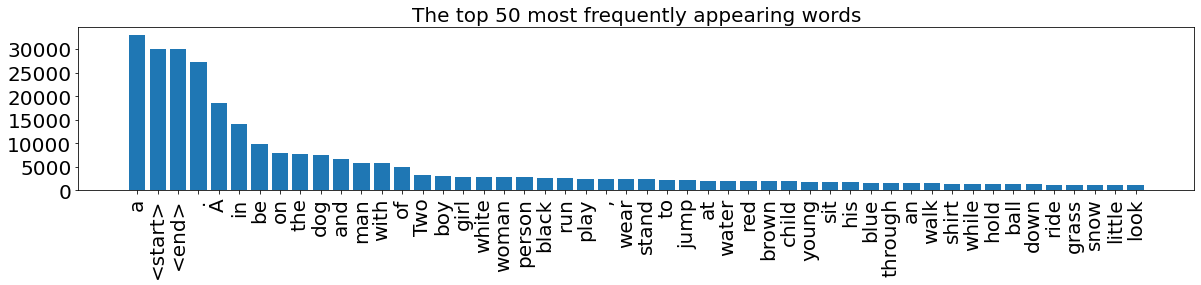

time: 648 ms (started: 2021-06-29 11:41:31 +00:00)


In [ ]:
visualization.plot_word_hist()

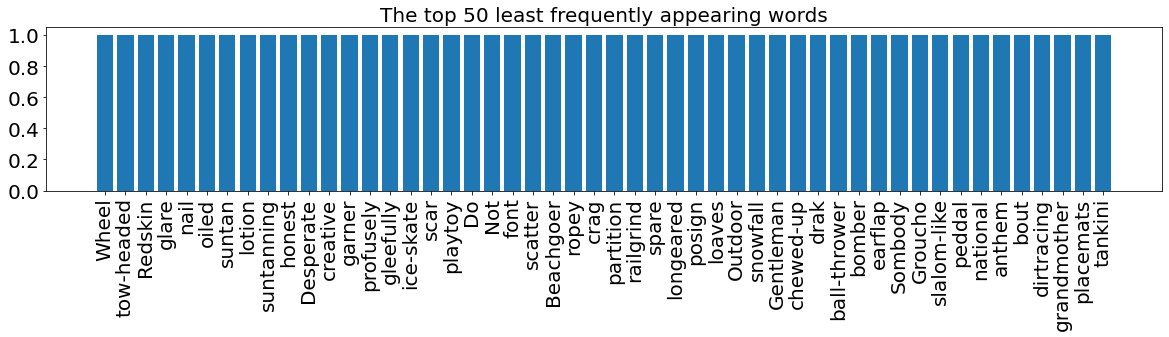

time: 649 ms (started: 2021-06-29 11:41:31 +00:00)


In [ ]:
visualization.plot_word_hist(top=False)

In [ ]:
visualization.print_counts()



There are 2691 words which are present 1 time(s) in the whole captions




There are 829 words which are present 2 time(s) in the whole captions




There are 384 words which are present 3 time(s) in the whole captions




There are 315 words which are present 4 time(s) in the whole captions




There are 216 words which are present 5 time(s) in the whole captions


And there are 1545 words which are present more than 5 but less than 100 times in the whole captions

And there are 348 words which are present more or equal 100 times in the whole captions

time: 3.07 s (started: 2021-06-29 11:41:32 +00:00)


## visualization of the image data

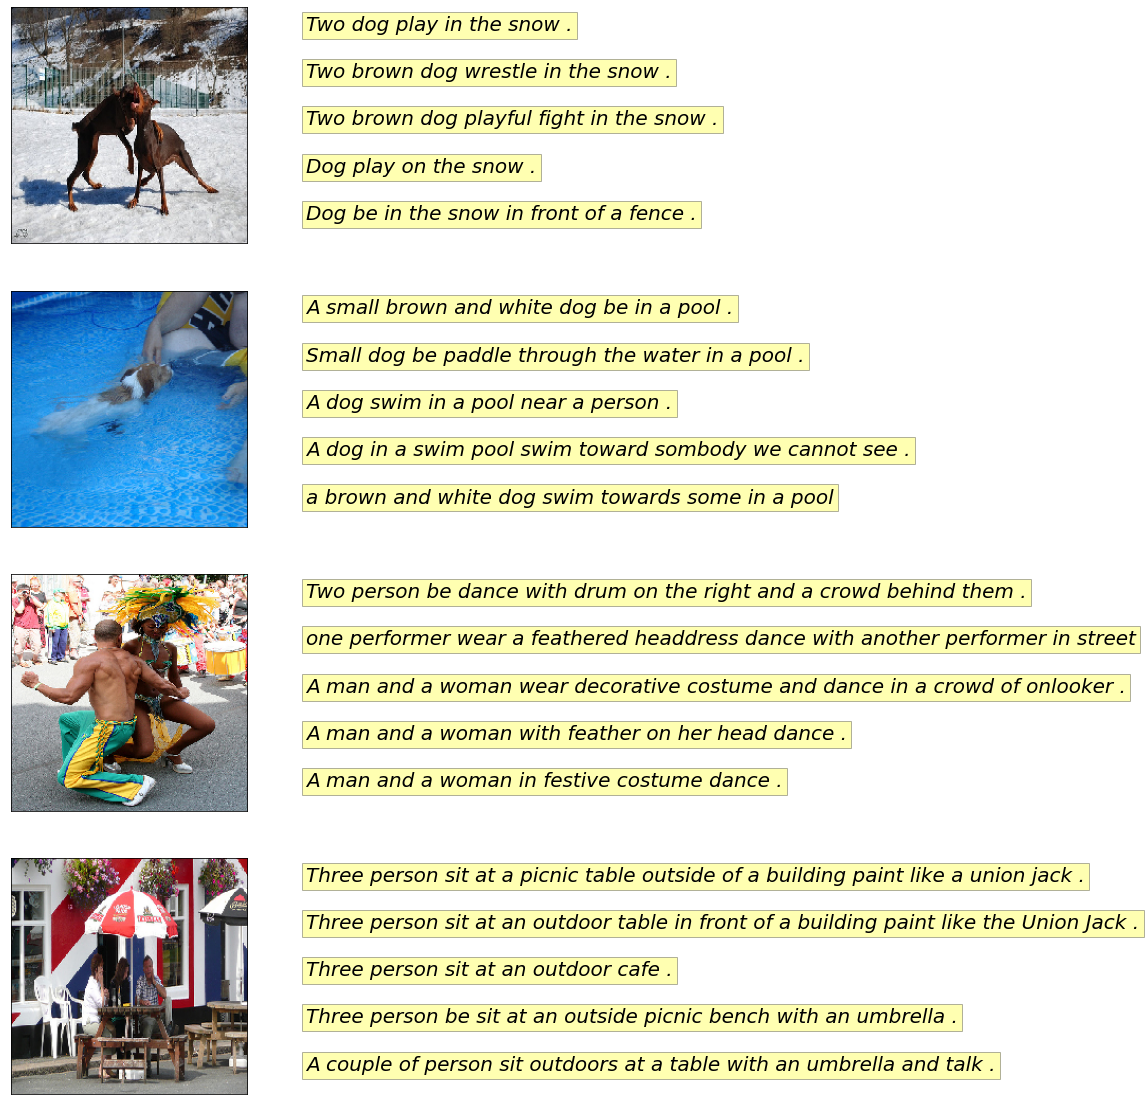

time: 1.05 s (started: 2021-06-29 11:41:39 +00:00)


In [ ]:
## here are some example how the data is given to you. 5 captions per image


visualization.disply_img_and_5captions(test_captions)

In [ ]:
# from collections import OrderedDict
# picked_pic = OrderedDict()

# picked_pic["purple"]  = [533,935,907,30,207]
# picked_pic["red"]     = [841,22,759,53,810]
# picked_pic["black"]     = [446,353,980,885,42]
# picked_pic["blue"]    = [694,761,192,7,311]
# picked_pic["green"]   = [278,659,91,560,173]
# picked_pic["magenta"] = [494,448,400,104,843]
# picked_pic["yellow"]  = [930,258,432,834,488]

time: 4.33 ms (started: 2021-06-29 11:41:40 +00:00)


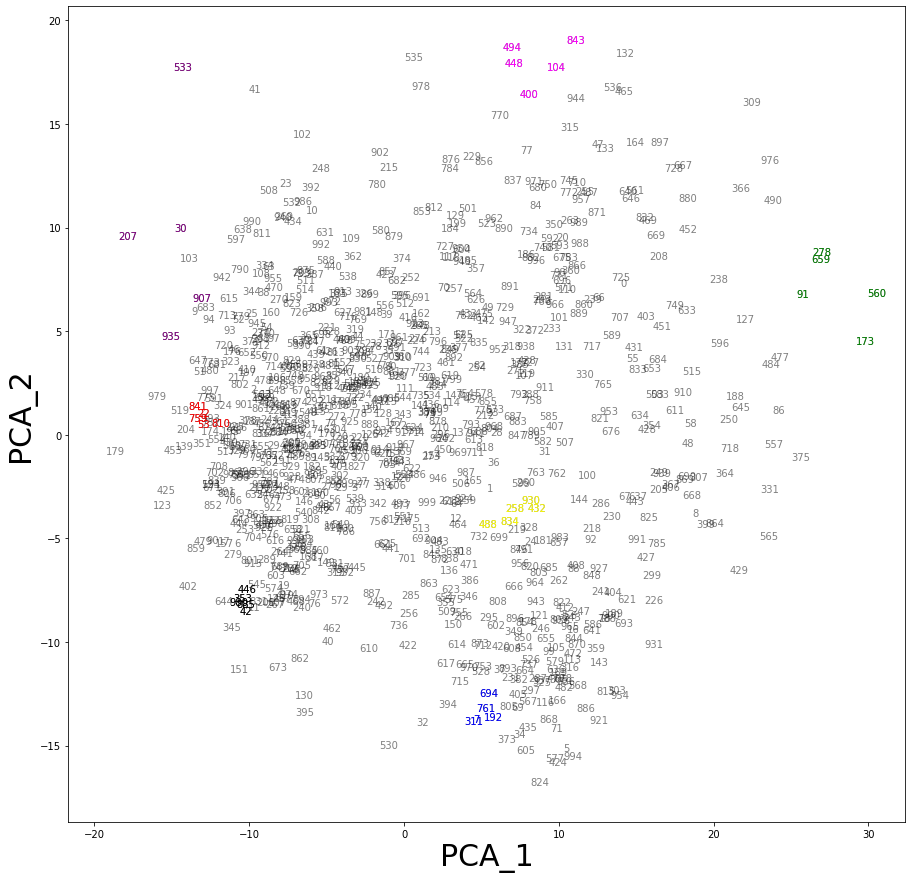

time: 5.3 s (started: 2021-06-29 11:41:41 +00:00)


In [ ]:
## Using PCA i wanted to show you that the feature vectors are well defined. Each position contains specific informations

visualization.plot_PCA(test_features)

In [ ]:
## some selected pictures that may be creating clusters
#these are just to display the related images from the dataset---> below

time: 1.34 ms (started: 2021-06-29 11:41:46 +00:00)


In [ ]:
## run this cell, you can see the images. perhaps as the image size is big, it is not showing here. 

visualization.show_clustered_pic_example(test_features)